In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"
temp_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/temp"


In [14]:
ee_flows = pd.read_csv(f"{data_dir}/LEHD/flows_by_education.csv")
employment = pd.read_csv(f"{data_dir}/LEHD/employment_by_education.csv")

In [15]:
# First, re-import and clean to start from raw data
ee_clean = ee_flows[['year', 'quarter', 'education', 'EE', 'EES', 'J2J', 'J2JS']]

ee_clean['EE'] = pd.to_numeric(ee_clean['EE'], errors='coerce')
ee_clean['EES'] = pd.to_numeric(ee_clean['EES'], errors='coerce')
ee_clean['J2J'] = pd.to_numeric(ee_clean['J2J'], errors='coerce')
ee_clean['J2JS'] = pd.to_numeric(ee_clean['J2JS'], errors='coerce')


emp_clean = employment[['year', 'quarter', 'education', 'Emp']]
emp_clean['Emp'] = pd.to_numeric(emp_clean['Emp'], errors='coerce')

# Merge
merged = pd.merge(ee_clean, emp_clean, on=['year', 'quarter', 'education'])

merged['date'] = pd.to_datetime(merged['year'].astype(str) + 'Q' + merged['quarter'].astype(str))

# Compute merged EE rate and convert to %
merged['ee_rate'] = 100 * merged['EE'] / merged['Emp']
merged['ee_rate_stable'] = 100 * merged['EES'] / merged['Emp']
merged['j2j_rate'] = 100 * merged['J2J'] / merged['Emp']
merged['j2j_rate_stable'] = 100 * merged['J2JS'] / merged['Emp']

# Already pivoted data: pivot_df
pivot_df = merged.pivot(index='date', columns='education', values='j2j_rate')

# Define periods
pivot_df['inf_period'] = ((pivot_df.index >= '2021-04-01') & (pivot_df.index <= '2023-05-01')).astype(int)
pivot_df['pre_period'] = (pivot_df.index <= '2019-12-01').astype(int)

# Resample to quarterly averages (calendar quarters)
pivot_quarterly = pivot_df.resample('Q').mean()

# Redefine period flags after resampling
pivot_quarterly['inf_period'] = ((pivot_quarterly.index >= '2021-04-01') & (pivot_quarterly.index <= '2023-05-01')).astype(int)
pivot_quarterly['pre_period'] = (pivot_quarterly.index <= '2019-12-01').astype(int)


# Loop over each education group
for edu_group in ['E2', 'E4']:
    
    pre_dates = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1].index
    inf_dates = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1].index
    
    avg_pre = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1, edu_group].mean()
    print("pre", avg_pre)
    avg_inf = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1, edu_group].mean()
    print("inflation", avg_inf)
    
    plt.figure(figsize=(8, 4))
    plt.plot(pivot_quarterly.index, pivot_quarterly[edu_group], marker='o', linewidth=2)
    plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(2,7)
    plt.tight_layout()
    
    # Save figure as PDF
    plt.savefig(f"{output_dir}/figures/{edu_group}_ee_rate_plot.pdf")
    plt.close()


pre 5.197668749768912
inflation 5.683132904312878
pre 4.137006231116104
inflation 4.745473955331873


C:\Users\singhy\AppData\Local\Temp\ipykernel_26416\975525852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee_clean['EE'] = pd.to_numeric(ee_clean['EE'], errors='coerce')
C:\Users\singhy\AppData\Local\Temp\ipykernel_26416\975525852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee_clean['EES'] = pd.to_numeric(ee_clean['EES'], errors='coerce')
C:\Users\singhy\AppData\Local\Temp\ipykernel_26416\975525852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

C:\Users\singhy\AppData\Local\Temp\ipykernel_26416\547256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee_clean['EE'] = pd.to_numeric(ee_clean['EE'], errors='coerce')
C:\Users\singhy\AppData\Local\Temp\ipykernel_26416\547256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee_clean['EES'] = pd.to_numeric(ee_clean['EES'], errors='coerce')
C:\Users\singhy\AppData\Local\Temp\ipykernel_26416\547256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

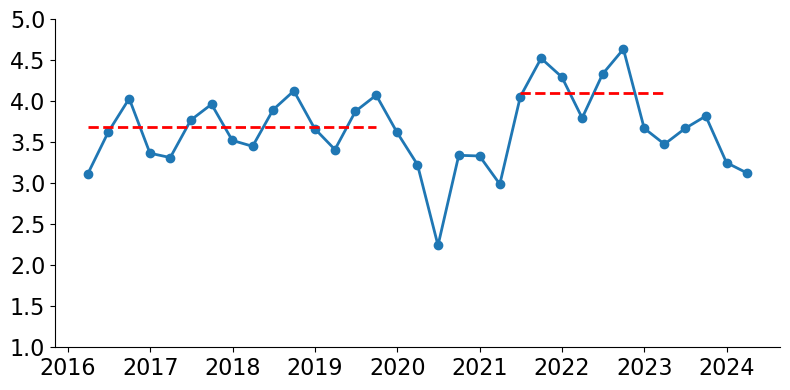

C:\Users\singhy\AppData\Local\Temp\ipykernel_26416\547256.py:63: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  e4_q = e4_only.resample('Q').mean()


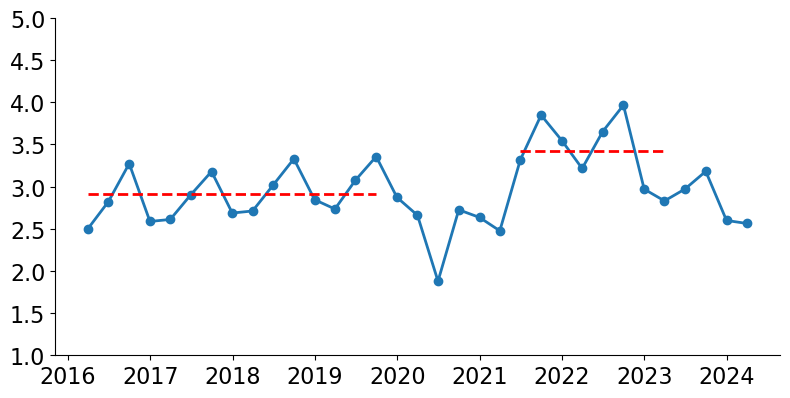

In [10]:
# First, re-import and clean to start from raw data
ee_clean = ee_flows[['year', 'quarter', 'education', 'EE', 'EES', 'J2J', 'J2JS']]

ee_clean['EE'] = pd.to_numeric(ee_clean['EE'], errors='coerce')
ee_clean['EES'] = pd.to_numeric(ee_clean['EES'], errors='coerce')
ee_clean['J2J'] = pd.to_numeric(ee_clean['J2J'], errors='coerce')
ee_clean['J2JS'] = pd.to_numeric(ee_clean['J2JS'], errors='coerce')




emp_clean = employment[['year', 'quarter', 'education', 'Emp']]
emp_clean['Emp'] = pd.to_numeric(emp_clean['Emp'], errors='coerce')

# Merge
merged = pd.merge(ee_clean, emp_clean, on=['year', 'quarter', 'education'])

# Create quarterly date
merged['date'] = pd.to_datetime(merged['year'].astype(str) + 'Q' + merged['quarter'].astype(str))

# Filter to E1, E2, E3 and group by date
pooled = merged[merged['education'].isin(['E1', 'E2', 'E3'])].groupby('date')[['EE','EES', 'J2J', 'J2JS', 'Emp']].sum()

# Compute pooled EE rate and convert to %
pooled['ee_rate'] = 100 * pooled['EE'] / pooled['Emp']
pooled['ee_rate_stable'] = 100 * pooled['EES'] / pooled['Emp']
pooled['j2j_rate'] = 100 * pooled['J2J'] / pooled['Emp']
pooled['j2j_rate_stable'] = 100 * pooled['J2JS'] / pooled['Emp']

# Resample to quarterly just to smooth in case of minor gaps
pooled_q = pooled.resample('Q').mean()

# Define period flags
pooled_q['inf_period'] = ((pooled_q.index >= '2021-04-01') & (pooled_q.index <= '2023-05-01')).astype(int)
pooled_q['pre_period'] = (pooled_q.index <= '2019-12-01').astype(int)

# Compute averages
pre_dates = pooled_q.loc[pooled_q['pre_period'] == 1].index
inf_dates = pooled_q.loc[pooled_q['inf_period'] == 1].index

avg_pre = pooled_q.loc[pooled_q['pre_period'] == 1, 'ee_rate'].mean()
avg_inf = pooled_q.loc[pooled_q['inf_period'] == 1, 'ee_rate'].mean()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(pooled_q.index, pooled_q['ee_rate'], marker='o', linewidth=2)
plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(1,5)
plt.tight_layout()
plt.show()


# Filter for E4 and group by date
e4_only = merged[merged['education'] == 'E4'].groupby('date')[['EE', 'Emp']].sum()
e4_only['ee_rate'] = 100 * e4_only['EE'] / e4_only['Emp']

# Resample to quarterly averages
e4_q = e4_only.resample('Q').mean()

# Define period flags
e4_q['inf_period'] = ((e4_q.index >= '2021-04-01') & (e4_q.index <= '2023-05-01')).astype(int)
e4_q['pre_period'] = (e4_q.index <= '2019-12-01').astype(int)

# Compute averages
pre_dates_e4 = e4_q.loc[e4_q['pre_period'] == 1].index
inf_dates_e4 = e4_q.loc[e4_q['inf_period'] == 1].index

avg_pre_e4 = e4_q.loc[e4_q['pre_period'] == 1, 'ee_rate'].mean()
avg_inf_e4 = e4_q.loc[e4_q['inf_period'] == 1, 'ee_rate'].mean()

# Plot for E4
plt.figure(figsize=(8, 4))
plt.plot(e4_q.index, e4_q['ee_rate'], marker='o', linewidth=2)
plt.hlines(avg_pre_e4, xmin=pre_dates_e4.min(), xmax=pre_dates_e4.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_inf_e4, xmin=inf_dates_e4.min(), xmax=inf_dates_e4.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
p
plt.tight_layout()
plt.ylim(1,5)
plt.show()



pre 2.30747370169896
inflation 2.5165851860821586


C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2780249739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee_clean['EE'] = pd.to_numeric(ee_clean['EE'], errors='coerce')
C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2780249739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee_clean['EES'] = pd.to_numeric(ee_clean['EES'], errors='coerce')
C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2780249739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

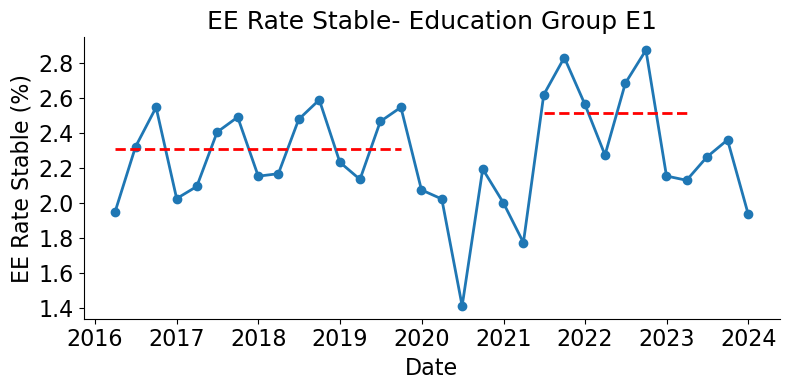

pre 2.147039716687327
inflation 2.4364838984963404


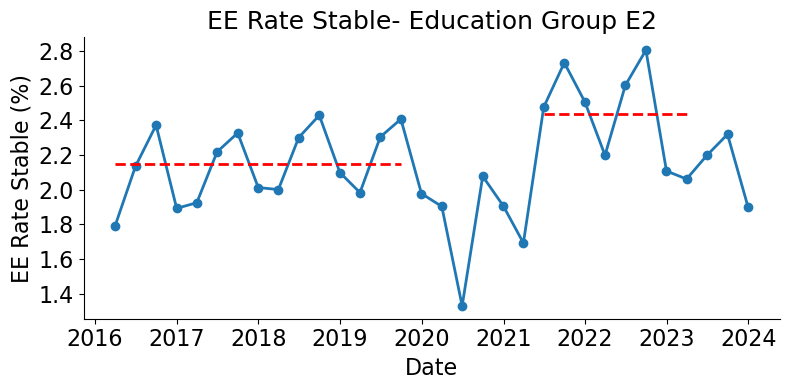

pre 2.119056890366616
inflation 2.430035982077325


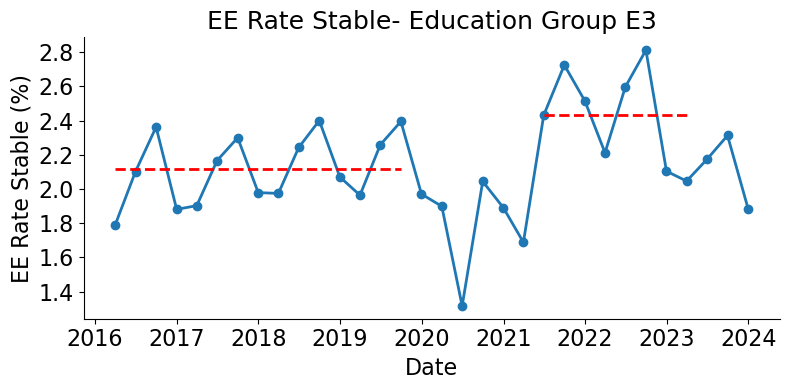

pre 1.9894858422791608
inflation 2.3184282698612932


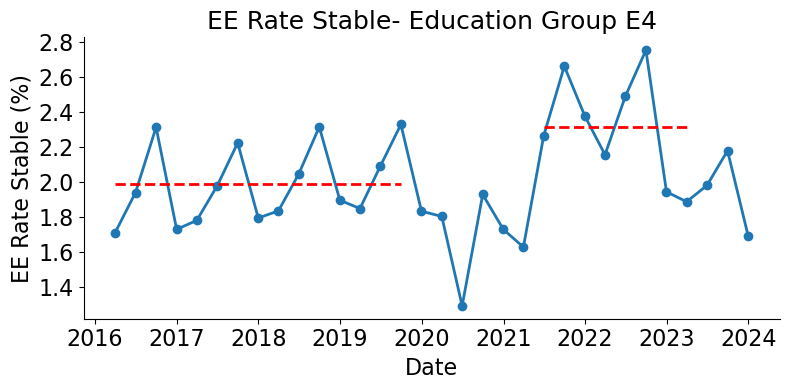

In [40]:
# First, re-import and clean to start from raw data
ee_clean = ee_flows[['year', 'quarter', 'education', 'EE', 'EES', 'J2J', 'J2JS']]

ee_clean['EE'] = pd.to_numeric(ee_clean['EE'], errors='coerce')
ee_clean['EES'] = pd.to_numeric(ee_clean['EES'], errors='coerce')
ee_clean['J2J'] = pd.to_numeric(ee_clean['J2J'], errors='coerce')
ee_clean['J2JS'] = pd.to_numeric(ee_clean['J2JS'], errors='coerce')


emp_clean = employment[['year', 'quarter', 'education', 'Emp']]
emp_clean['Emp'] = pd.to_numeric(emp_clean['Emp'], errors='coerce')

# Merge
merged = pd.merge(ee_clean, emp_clean, on=['year', 'quarter', 'education'])

merged['date'] = pd.to_datetime(merged['year'].astype(str) + 'Q' + merged['quarter'].astype(str))

# Compute merged EE rate and convert to %
merged['ee_rate'] = 100 * merged['EE'] / merged['Emp']
merged['ee_rate_stable'] = 100 * merged['EES'] / merged['Emp']
merged['j2j_rate'] = 100 * merged['J2J'] / merged['Emp']
merged['j2j_rate_stable'] = 100 * merged['J2JS'] / merged['Emp']

# Already pivoted data: pivot_df
pivot_df = merged.pivot(index='date', columns='education', values='ee_rate_stable')

# Define periods
pivot_df['inf_period'] = ((pivot_df.index >= '2021-04-01') & (pivot_df.index <= '2023-05-01')).astype(int)
pivot_df['pre_period'] = (pivot_df.index <= '2019-12-01').astype(int)

# Resample to quarterly averages (calendar quarters)
pivot_quarterly = pivot_df.resample('Q').mean()

# Redefine period flags after resampling
pivot_quarterly['inf_period'] = ((pivot_quarterly.index >= '2021-04-01') & (pivot_quarterly.index <= '2023-05-01')).astype(int)
pivot_quarterly['pre_period'] = (pivot_quarterly.index <= '2019-12-01').astype(int)

# Loop over each education group
for edu_group in ['E1', 'E2', 'E3', 'E4']:
    
    pre_dates = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1].index
    inf_dates = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1].index
    
    avg_pre = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1, edu_group].mean()
    print("pre", avg_pre)
    avg_inf = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1, edu_group].mean()
    print("inflation", avg_inf)
    
    plt.figure(figsize=(8, 4))
    plt.plot(pivot_quarterly.index, pivot_quarterly[edu_group], marker='o', linewidth=2)
    plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(f'EE Rate Stable- Education Group {edu_group}', fontsize=18)
    plt.ylabel('EE Rate Stable (%)', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.tight_layout()
    plt.show()


In [36]:
# Already pivoted data: pivot_df
pivot_df = merged.pivot(index='date', columns='education', values='ee_rate')

# Define periods
pivot_df['inf_period'] = ((pivot_df.index >= '2021-04-01') & (pivot_df.index <= '2023-05-01')).astype(int)
pivot_df['pre_period'] = (pivot_df.index <= '2019-12-01').astype(int)

# Resample to quarterly averages (calendar quarters)
pivot_quarterly = pivot_df.resample('Q').mean()

# Redefine period flags after resampling
pivot_quarterly['inf_period'] = ((pivot_quarterly.index >= '2021-04-01') & (pivot_quarterly.index <= '2023-05-01')).astype(int)
pivot_quarterly['pre_period'] = (pivot_quarterly.index <= '2019-12-01').astype(int)

# Loop over each education group
for edu_group in ['E1', 'E2', 'E3', 'E4']:
    
    pre_dates = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1].index
    inf_dates = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1].index
    
    avg_pre = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1, edu_group].mean()
    print("pre", avg_pre)
    avg_inf = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1, edu_group].mean()
    print("inflation", avg_inf)
    
    plt.figure(figsize=(8, 4))
    plt.plot(pivot_quarterly.index, pivot_quarterly[edu_group], marker='o', linewidth=2)
    plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(f'EE Rate - Education Group {edu_group}', fontsize=18)
    plt.ylabel('EE Rate (%)', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.tight_layout()
    plt.show()


KeyError: 'ee_rate'

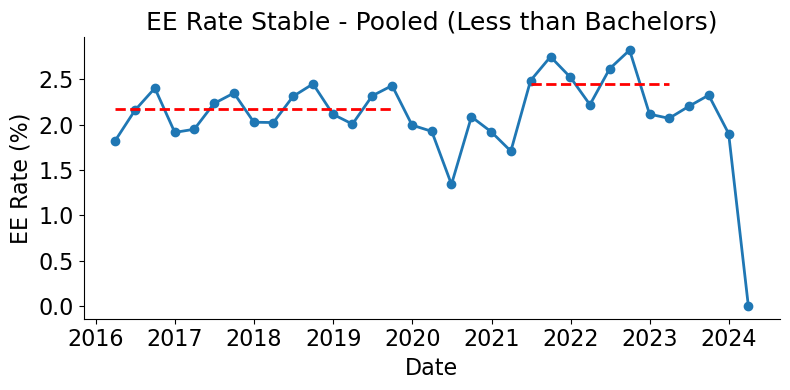

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\4152043227.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  e4_q = e4_only.resample('Q').mean()


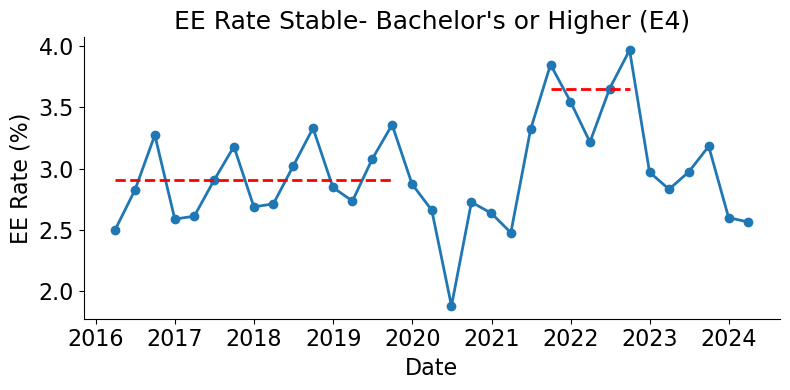

In [25]:

avg_pre = pooled_q.loc[pooled_q['pre_period'] == 1, 'ee_rate_stable'].mean()
avg_inf = pooled_q.loc[pooled_q['inf_period'] == 1, 'ee_rate_stable'].mean()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(pooled_q.index, pooled_q['ee_rate_stable'], marker='o', linewidth=2)
plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('EE Rate Stable - Pooled (Less than Bachelors)', fontsize=18)
plt.ylabel('EE Rate (%)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tight_layout()
plt.show()


# Filter for E4 and group by date
e4_only = merged[merged['education'] == 'E4'].groupby('date')[['EE', 'Emp']].sum()
e4_only['ee_rate_stable'] = 100 * e4_only['EE'] / e4_only['Emp']

# Resample to quarterly averages
e4_q = e4_only.resample('Q').mean()

# Define period flags
e4_q['inf_period'] = ((e4_q.index >= '2021-09-01') & (e4_q.index <= '2022-12-01')).astype(int)
e4_q['pre_period'] = (e4_q.index <= '2019-12-01').astype(int)

# Compute averages
pre_dates_e4 = e4_q.loc[e4_q['pre_period'] == 1].index
inf_dates_e4 = e4_q.loc[e4_q['inf_period'] == 1].index

avg_pre_e4 = e4_q.loc[e4_q['pre_period'] == 1, 'ee_rate_stable'].mean()
avg_inf_e4 = e4_q.loc[e4_q['inf_period'] == 1, 'ee_rate_stable'].mean()

# Plot for E4
plt.figure(figsize=(8, 4))
plt.plot(e4_q.index, e4_q['ee_rate_stable'], marker='o', linewidth=2)
plt.hlines(avg_pre_e4, xmin=pre_dates_e4.min(), xmax=pre_dates_e4.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_inf_e4, xmin=inf_dates_e4.min(), xmax=inf_dates_e4.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('EE Rate Stable- Bachelor\'s or Higher (E4)', fontsize=18)
plt.ylabel('EE Rate (%)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tight_layout()
plt.show()

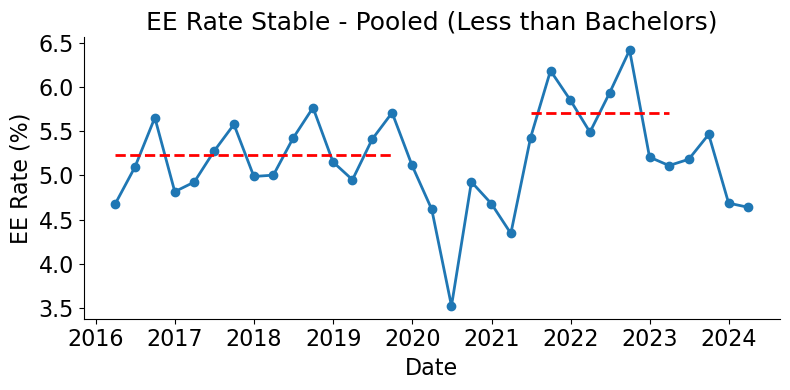

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\1304921695.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  e4_q = e4_only.resample('Q').mean()


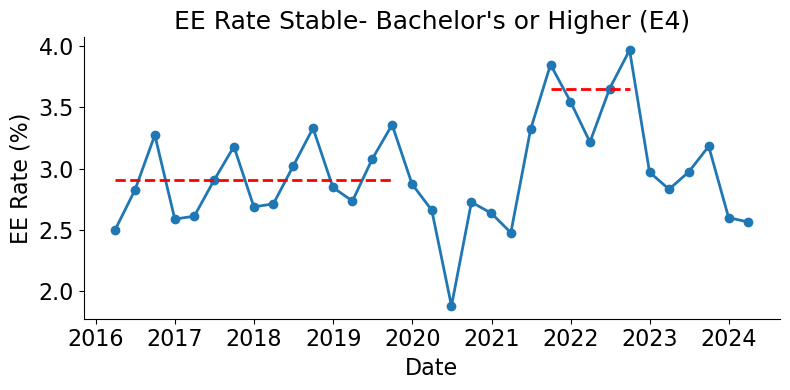

In [26]:

avg_pre = pooled_q.loc[pooled_q['pre_period'] == 1, 'j2j_rate'].mean()
avg_inf = pooled_q.loc[pooled_q['inf_period'] == 1, 'j2j_rate'].mean()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(pooled_q.index, pooled_q['j2j_rate'], marker='o', linewidth=2)
plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('EE Rate Stable - Pooled (Less than Bachelors)', fontsize=18)
plt.ylabel('EE Rate (%)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tight_layout()
plt.show()


# Filter for E4 and group by date
e4_only = merged[merged['education'] == 'E4'].groupby('date')[['EE', 'Emp']].sum()
e4_only['j2j_rate'] = 100 * e4_only['EE'] / e4_only['Emp']

# Resample to quarterly averages
e4_q = e4_only.resample('Q').mean()

# Define period flags
e4_q['inf_period'] = ((e4_q.index >= '2021-09-01') & (e4_q.index <= '2022-12-01')).astype(int)
e4_q['pre_period'] = (e4_q.index <= '2019-12-01').astype(int)

# Compute averages
pre_dates_e4 = e4_q.loc[e4_q['pre_period'] == 1].index
inf_dates_e4 = e4_q.loc[e4_q['inf_period'] == 1].index

avg_pre_e4 = e4_q.loc[e4_q['pre_period'] == 1, 'j2j_rate'].mean()
avg_inf_e4 = e4_q.loc[e4_q['inf_period'] == 1, 'j2j_rate'].mean()

# Plot for E4
plt.figure(figsize=(8, 4))
plt.plot(e4_q.index, e4_q['j2j_rate'], marker='o', linewidth=2)
plt.hlines(avg_pre_e4, xmin=pre_dates_e4.min(), xmax=pre_dates_e4.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_inf_e4, xmin=inf_dates_e4.min(), xmax=inf_dates_e4.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('EE Rate Stable- Bachelor\'s or Higher (E4)', fontsize=18)
plt.ylabel('EE Rate (%)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tight_layout()
plt.show()

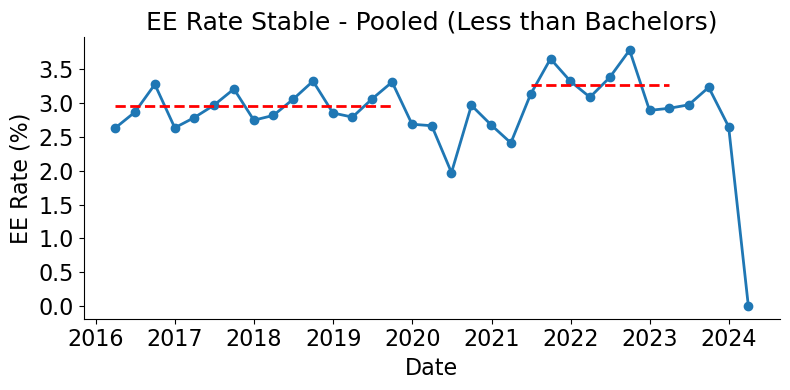

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2648018974.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  e4_q = e4_only.resample('Q').mean()


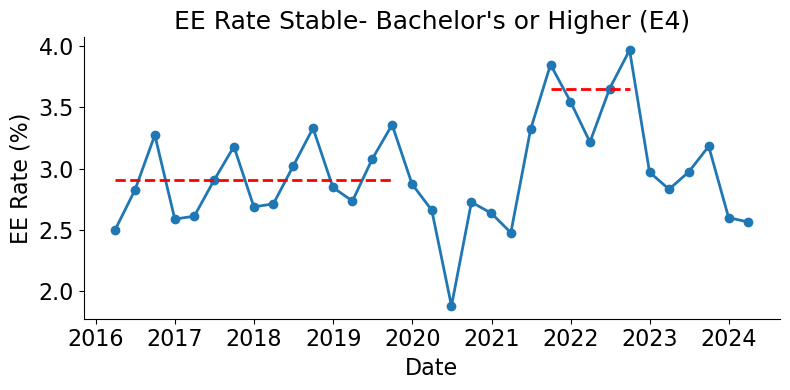

In [27]:

avg_pre = pooled_q.loc[pooled_q['pre_period'] == 1, 'j2j_rate_stable'].mean()
avg_inf = pooled_q.loc[pooled_q['inf_period'] == 1, 'j2j_rate_stable'].mean()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(pooled_q.index, pooled_q['j2j_rate_stable'], marker='o', linewidth=2)
plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('EE Rate Stable - Pooled (Less than Bachelors)', fontsize=18)
plt.ylabel('EE Rate (%)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tight_layout()
plt.show()


# Filter for E4 and group by date
e4_only = merged[merged['education'] == 'E4'].groupby('date')[['EE', 'Emp']].sum()
e4_only['j2j_rate_stable'] = 100 * e4_only['EE'] / e4_only['Emp']

# Resample to quarterly averages
e4_q = e4_only.resample('Q').mean()

# Define period flags
e4_q['inf_period'] = ((e4_q.index >= '2021-09-01') & (e4_q.index <= '2022-12-01')).astype(int)
e4_q['pre_period'] = (e4_q.index <= '2019-12-01').astype(int)

# Compute averages
pre_dates_e4 = e4_q.loc[e4_q['pre_period'] == 1].index
inf_dates_e4 = e4_q.loc[e4_q['inf_period'] == 1].index

avg_pre_e4 = e4_q.loc[e4_q['pre_period'] == 1, 'j2j_rate_stable'].mean()
avg_inf_e4 = e4_q.loc[e4_q['inf_period'] == 1, 'j2j_rate_stable'].mean()

# Plot for E4
plt.figure(figsize=(8, 4))
plt.plot(e4_q.index, e4_q['j2j_rate_stable'], marker='o', linewidth=2)
plt.hlines(avg_pre_e4, xmin=pre_dates_e4.min(), xmax=pre_dates_e4.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_inf_e4, xmin=inf_dates_e4.min(), xmax=inf_dates_e4.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('EE Rate Stable- Bachelor\'s or Higher (E4)', fontsize=18)
plt.ylabel('EE Rate (%)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
# Already pivoted data: pivot_df
pivot_df = merged.pivot(index='date', columns='education', values='ee_rate')

# Define periods
pivot_df['inf_period'] = ((pivot_df.index >= '2021-04-01') & (pivot_df.index <= '2023-05-01')).astype(int)
pivot_df['pre_period'] = (pivot_df.index <= '2019-12-01').astype(int)

# Resample to quarterly averages (calendar quarters)
pivot_quarterly = pivot_df.resample('Q').mean()

# Redefine period flags after resampling
pivot_quarterly['inf_period'] = ((pivot_quarterly.index >= '2021-04-01') & (pivot_quarterly.index <= '2023-05-01')).astype(int)
pivot_quarterly['pre_period'] = (pivot_quarterly.index <= '2019-12-01').astype(int)

# Loop over each education group
for edu_group in ['E1', 'E2', 'E3', 'E4']:
    
    pre_dates = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1].index
    inf_dates = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1].index
    
    avg_pre = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1, edu_group].mean()
    print("pre", avg_pre)
    avg_inf = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1, edu_group].mean()
    print("inflation", avg_inf)
    
    plt.figure(figsize=(8, 4))
    plt.plot(pivot_quarterly.index, pivot_quarterly[edu_group], marker='o', linewidth=2)
    plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(f'EE Rate - Education Group {edu_group}', fontsize=18)
    plt.ylabel('EE Rate (%)', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.tight_layout()
    plt.show()


KeyError: 'ee_rate'

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2668467305.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df[[rate_series]].resample('Q').mean()


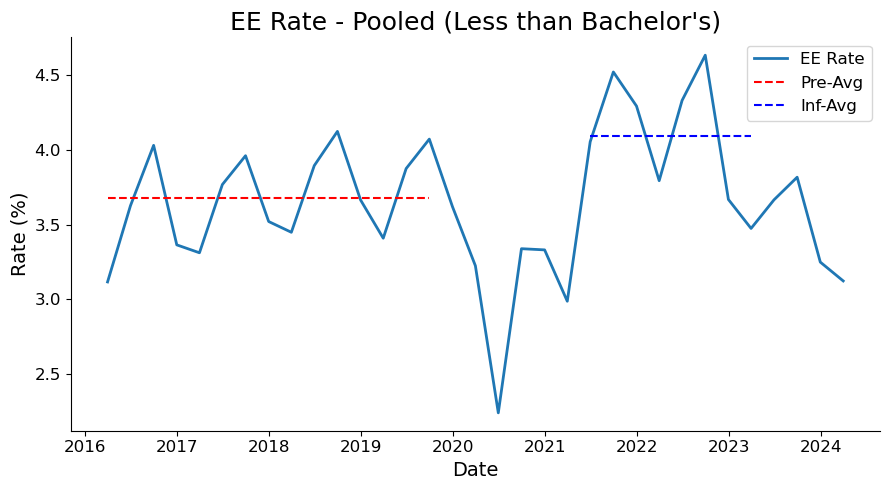

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2668467305.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df[[rate_series]].resample('Q').mean()


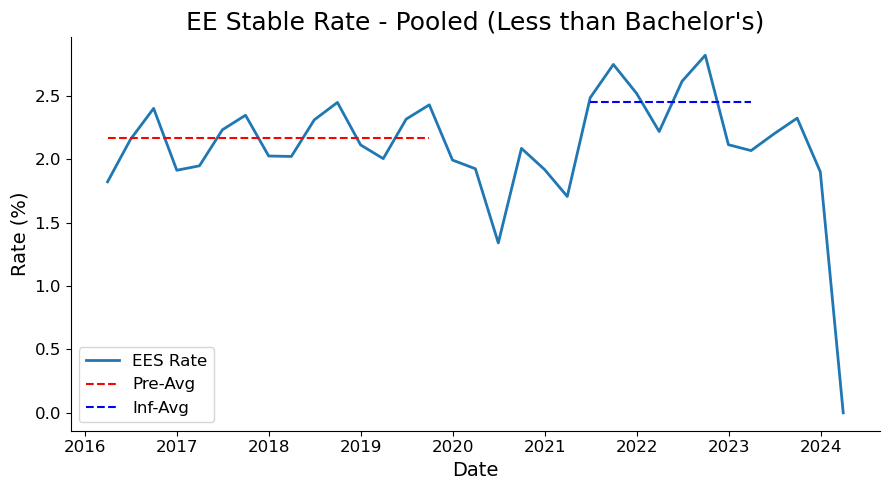

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2668467305.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df[[rate_series]].resample('Q').mean()


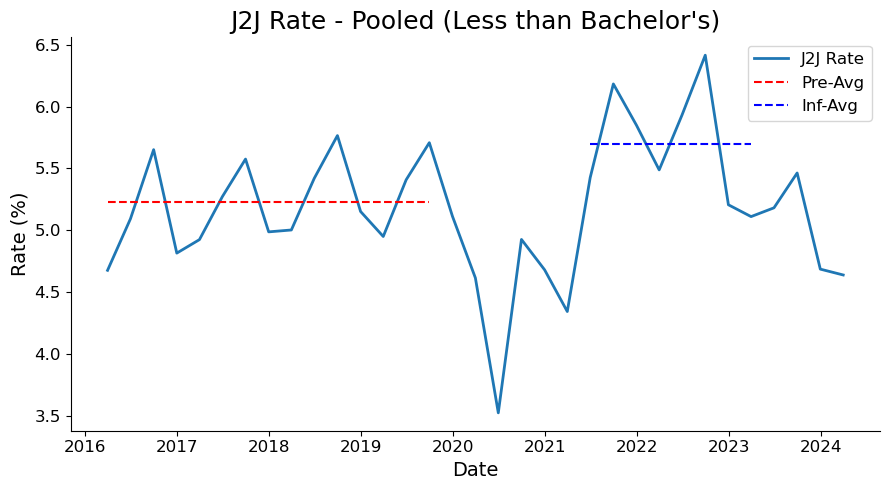

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2668467305.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df[[rate_series]].resample('Q').mean()


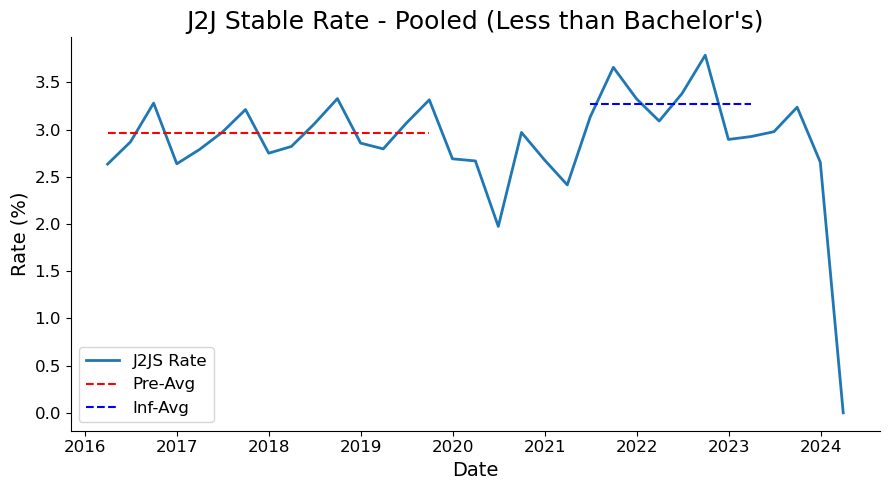

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2668467305.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df[[rate_series]].resample('Q').mean()


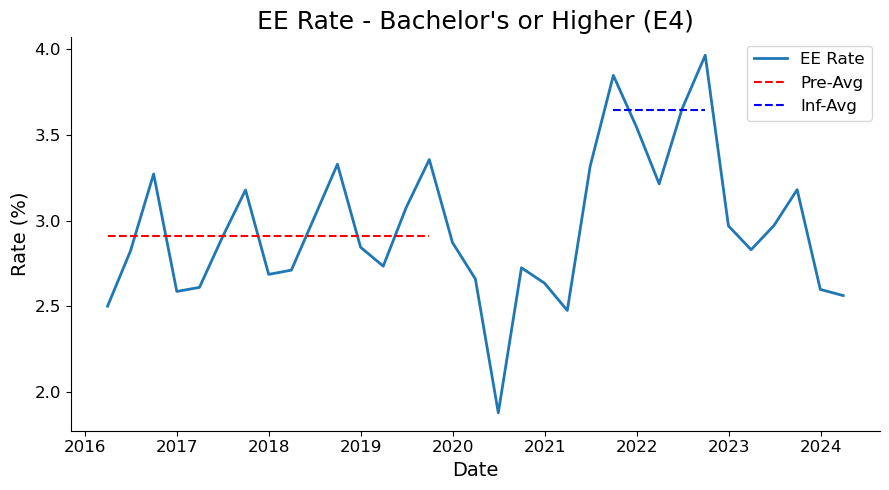

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2668467305.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df[[rate_series]].resample('Q').mean()


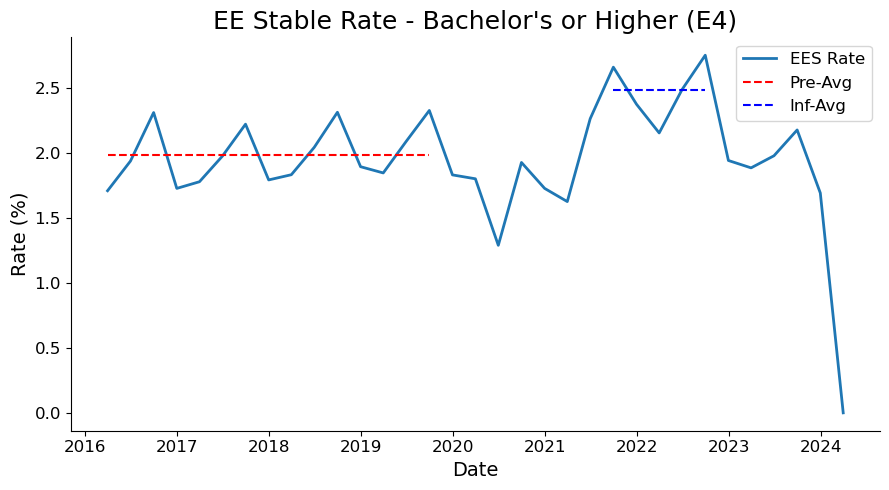

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2668467305.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df[[rate_series]].resample('Q').mean()


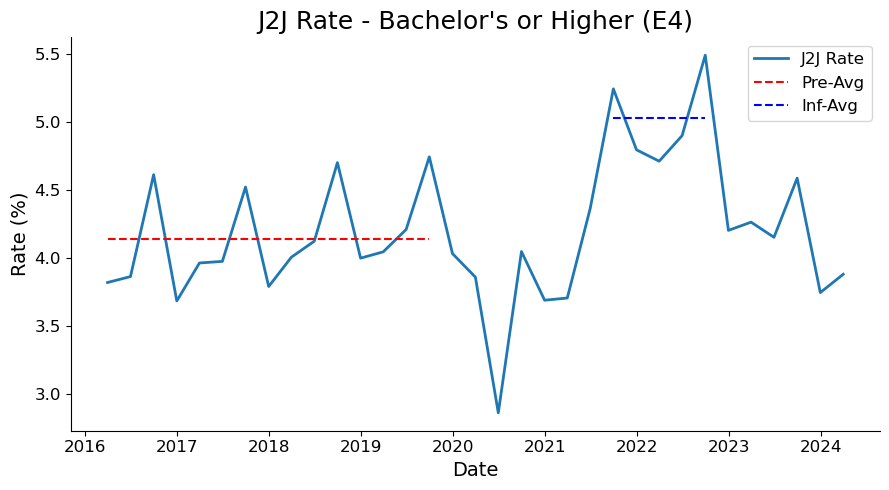

C:\Users\singhy\AppData\Local\Temp\ipykernel_29148\2668467305.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df[[rate_series]].resample('Q').mean()


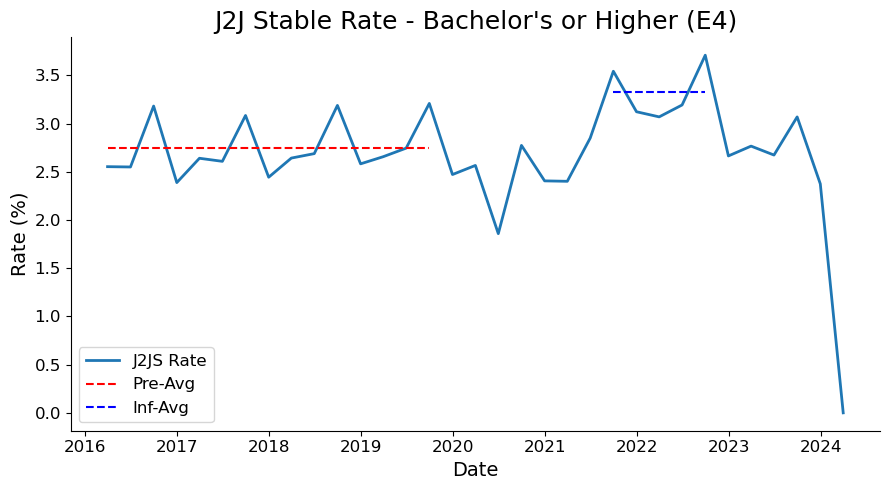

In [11]:
import matplotlib.pyplot as plt

# Define helper function
def plot_series_with_averages(df, series, pre_start, pre_end, inf_start, inf_end, title):
    # Compute rates
    rate_series = f"{series.lower()}_rate"
    df[rate_series] = 100 * df[series] / df['Emp']

    # Resample to quarterly
    df_q = df[[rate_series]].resample('Q').mean()

    # Define period flags
    df_q['pre_period'] = ((df_q.index >= pre_start) & (df_q.index <= pre_end)).astype(int)
    df_q['inf_period'] = ((df_q.index >= inf_start) & (df_q.index <= inf_end)).astype(int)

    # Compute averages
    avg_pre = df_q.loc[df_q['pre_period'] == 1, rate_series].mean()
    avg_inf = df_q.loc[df_q['inf_period'] == 1, rate_series].mean()
    pre_dates = df_q.loc[df_q['pre_period'] == 1].index
    inf_dates = df_q.loc[df_q['inf_period'] == 1].index

    # Plot
    plt.figure(figsize=(9, 5))
    plt.plot(df_q.index, df_q[rate_series], label=f'{series} Rate', linewidth=2)
    plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', label='Pre-Avg')
    plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='blue', linestyle='--', label='Inf-Avg')

    plt.title(title, fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Rate (%)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.tight_layout()
    plt.show()

# ----------------------------------------------------------------------------------
# Process for pooled (E1–E3)
pooled = merged[merged['education'].isin(['E1', 'E2', 'E3'])].groupby('date')[['EE','EES','J2J','J2JS','Emp']].sum()

plot_series_with_averages(
    pooled, 
    series='EE', 
    pre_start='2014-01-01', pre_end='2019-12-01', 
    inf_start='2021-04-01', inf_end='2023-05-01', 
    title='EE Rate - Pooled (Less than Bachelor\'s)'
)

plot_series_with_averages(
    pooled, 
    series='EES', 
    pre_start='2014-01-01', pre_end='2019-12-01', 
    inf_start='2021-04-01', inf_end='2023-05-01', 
    title='EE Stable Rate - Pooled (Less than Bachelor\'s)'
)

plot_series_with_averages(
    pooled, 
    series='J2J', 
    pre_start='2014-01-01', pre_end='2019-12-01', 
    inf_start='2021-04-01', inf_end='2023-05-01', 
    title='J2J Rate - Pooled (Less than Bachelor\'s)'
)

plot_series_with_averages(
    pooled, 
    series='J2JS', 
    pre_start='2014-01-01', pre_end='2019-12-01', 
    inf_start='2021-04-01', inf_end='2023-05-01', 
    title='J2J Stable Rate - Pooled (Less than Bachelor\'s)'
)

# ----------------------------------------------------------------------------------
# Process for E4 (Bachelor’s or higher)
e4_only = merged[merged['education'] == 'E4'].groupby('date')[['EE','EES','J2J','J2JS','Emp']].sum()

plot_series_with_averages(
    e4_only, 
    series='EE', 
    pre_start='2014-01-01', pre_end='2019-12-01', 
    inf_start='2021-09-01', inf_end='2022-12-01', 
    title='EE Rate - Bachelor\'s or Higher (E4)'
)

plot_series_with_averages(
    e4_only, 
    series='EES', 
    pre_start='2014-01-01', pre_end='2019-12-01', 
    inf_start='2021-09-01', inf_end='2022-12-01', 
    title='EE Stable Rate - Bachelor\'s or Higher (E4)'
)

plot_series_with_averages(
    e4_only, 
    series='J2J', 
    pre_start='2014-01-01', pre_end='2019-12-01', 
    inf_start='2021-09-01', inf_end='2022-12-01', 
    title='J2J Rate - Bachelor\'s or Higher (E4)'
)

plot_series_with_averages(
    e4_only, 
    series='J2JS', 
    pre_start='2014-01-01', pre_end='2019-12-01', 
    inf_start='2021-09-01', inf_end='2022-12-01', 
    title='J2J Stable Rate - Bachelor\'s or Higher (E4)'
)


In [9]:
# Clean and subset relevant columns
ee_clean = ee_flows[['year', 'quarter', 'education', 'EE']]
ee_clean['EE'] = pd.to_numeric(ee_clean['EE'], errors='coerce')

emp_clean = employment[['year', 'quarter', 'education', 'Emp']]
emp_clean['Emp'] = pd.to_numeric(emp_clean['Emp'], errors='coerce')

# Merge on year, quarter, and education
merged = pd.merge(ee_clean, emp_clean, on=['year', 'quarter', 'education'])

# Compute EE rate
merged['ee_rate'] = merged['EE'] / merged['Emp']

# Optional: Create a datetime column for time series plotting
merged['date'] = pd.to_datetime(merged['year'].astype(str) + 'Q' + merged['quarter'].astype(str))

# Sort for plotting
merged = merged.sort_values(by=['education', 'date'])

# Show result
merged[['date', 'education', 'ee_rate']].head()


C:\Users\singhy\AppData\Local\Temp\ipykernel_12772\711891003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee_clean['EE'] = pd.to_numeric(ee_clean['EE'], errors='coerce')
C:\Users\singhy\AppData\Local\Temp\ipykernel_12772\711891003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_clean['Emp'] = pd.to_numeric(emp_clean['Emp'], errors='coerce')
C:\Users\singhy\AppData\Local\Temp\ipykernel_12772\711891003.py:15: UserWarning: Could not infer format, so each element will be parsed individually, fall

,date,education,ee_rate
0,2016-01-01,E1,0.035703
4,2016-04-01,E1,0.041870
8,2016-07-01,E1,0.046337
12,2016-10-01,E1,0.038545
16,2017-01-01,E1,0.037924


In [12]:
pivot_df = merged.pivot(index='date', columns='education', values='ee_rate')

In [14]:
pivot_df.columns

Index(['E1', 'E2', 'E3', 'E4'], dtype='object', name='education')

In [17]:
pivot_df

education,E1,E2,E3,E4,inf_period,pre_period
date,,,,,,
2016-01-01,3.570305,3.085917,2.936730,2.501034,0,1
2016-04-01,4.187010,3.605103,3.389723,2.823385,0,1
2016-07-01,4.633679,3.999238,3.777552,3.273185,0,1
2016-10-01,3.854483,3.341559,3.155917,2.587072,0,1
2017-01-01,3.792428,3.288998,3.108051,2.610906,0,1
2017-04-01,4.339580,3.759279,3.509327,2.903429,0,1
2017-07-01,4.542659,3.941494,3.703296,3.179371,0,1
2017-10-01,4.019631,3.507981,3.295196,2.686824,0,1
2018-01-01,3.930410,3.428541,3.239280,2.711431,0,1


C:\Users\singhy\AppData\Local\Temp\ipykernel_12772\1134561146.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pivot_quarterly = pivot_df.resample('Q').mean()


pre 4.196819671966356
inflation 4.450013465471946


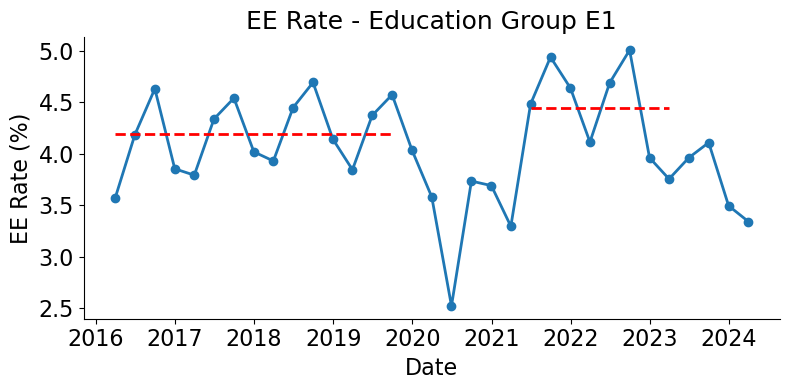

pre 3.660227417599887
inflation 4.084722525629324


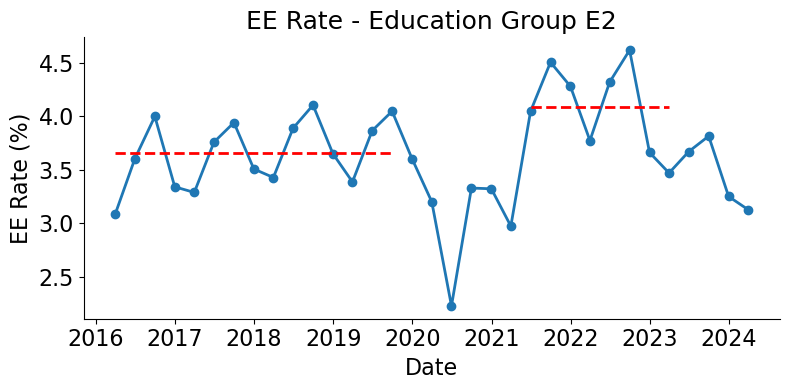

pre 3.452205830827586
inflation 3.934329621568333


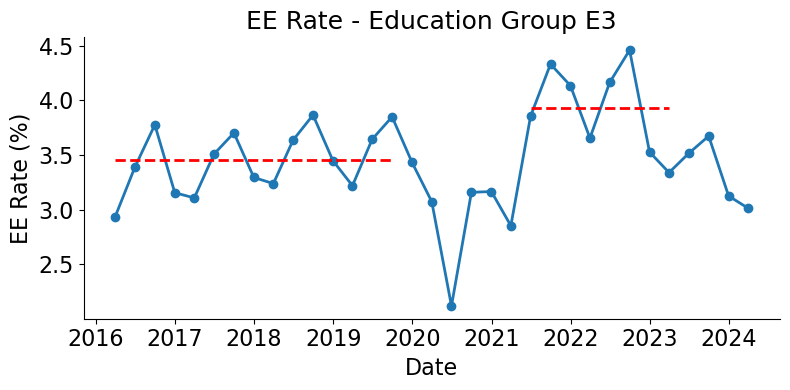

pre 2.9092431170695767
inflation 3.418658321638525


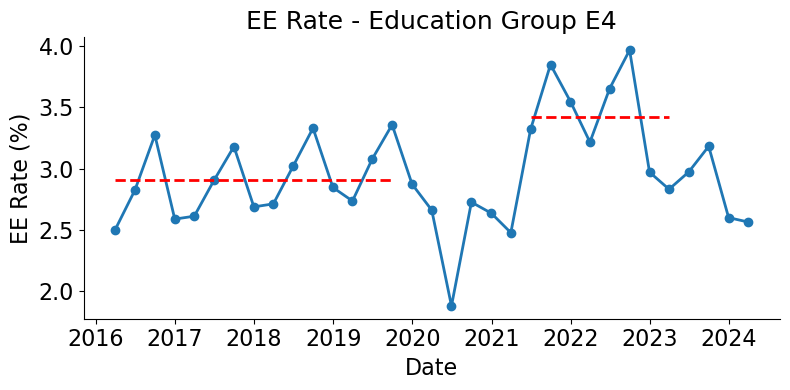

In [23]:
# Already pivoted data: pivot_df

# Define periods
pivot_df['inf_period'] = ((pivot_df.index >= '2021-04-01') & (pivot_df.index <= '2023-05-01')).astype(int)
pivot_df['pre_period'] = (pivot_df.index <= '2019-12-01').astype(int)

# Resample to quarterly averages (calendar quarters)
pivot_quarterly = pivot_df.resample('Q').mean()

# Redefine period flags after resampling
pivot_quarterly['inf_period'] = ((pivot_quarterly.index >= '2021-04-01') & (pivot_quarterly.index <= '2023-05-01')).astype(int)
pivot_quarterly['pre_period'] = (pivot_quarterly.index <= '2019-12-01').astype(int)

# Loop over each education group
for edu_group in ['E1', 'E2', 'E3', 'E4']:
    
    pre_dates = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1].index
    inf_dates = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1].index
    
    avg_pre = pivot_quarterly.loc[pivot_quarterly['pre_period'] == 1, edu_group].mean()
    print("pre", avg_pre)
    avg_inf = pivot_quarterly.loc[pivot_quarterly['inf_period'] == 1, edu_group].mean()
    print("inflation", avg_inf)
    
    plt.figure(figsize=(8, 4))
    plt.plot(pivot_quarterly.index, pivot_quarterly[edu_group], marker='o', linewidth=2)
    plt.hlines(avg_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.hlines(avg_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(f'EE Rate - Education Group {edu_group}', fontsize=18)
    plt.ylabel('EE Rate (%)', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.tight_layout()
    plt.show()


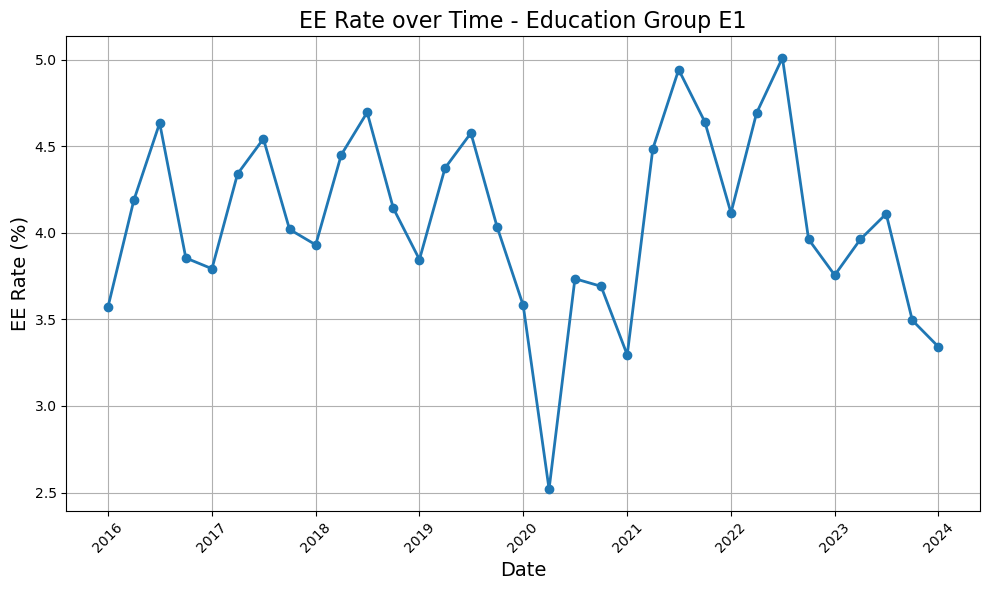

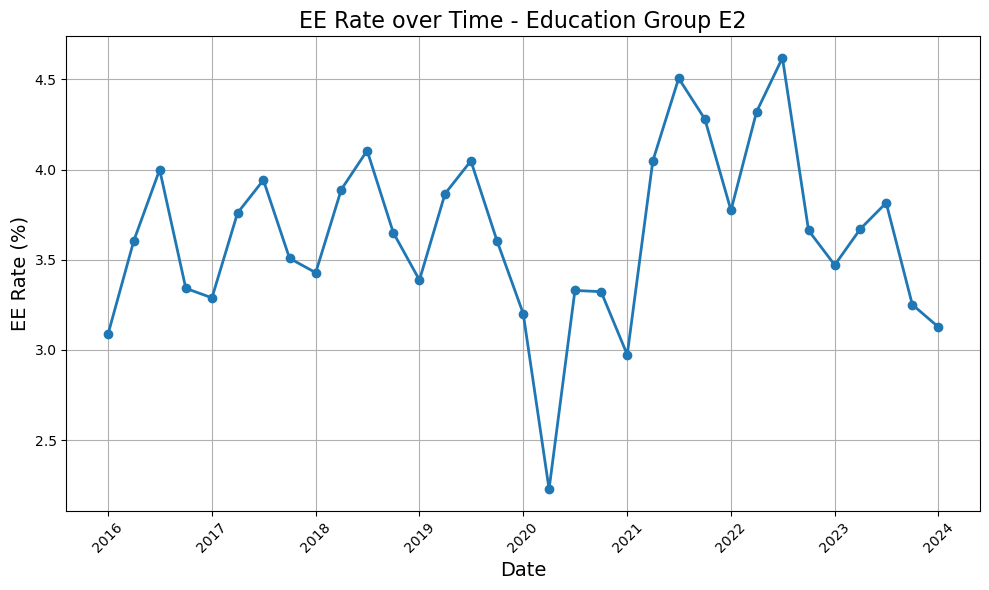

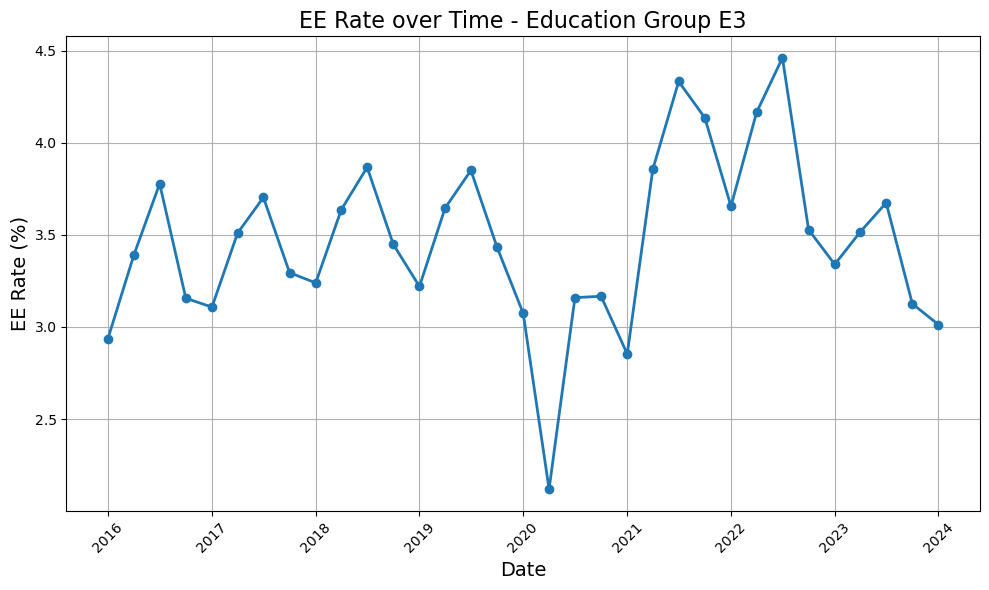

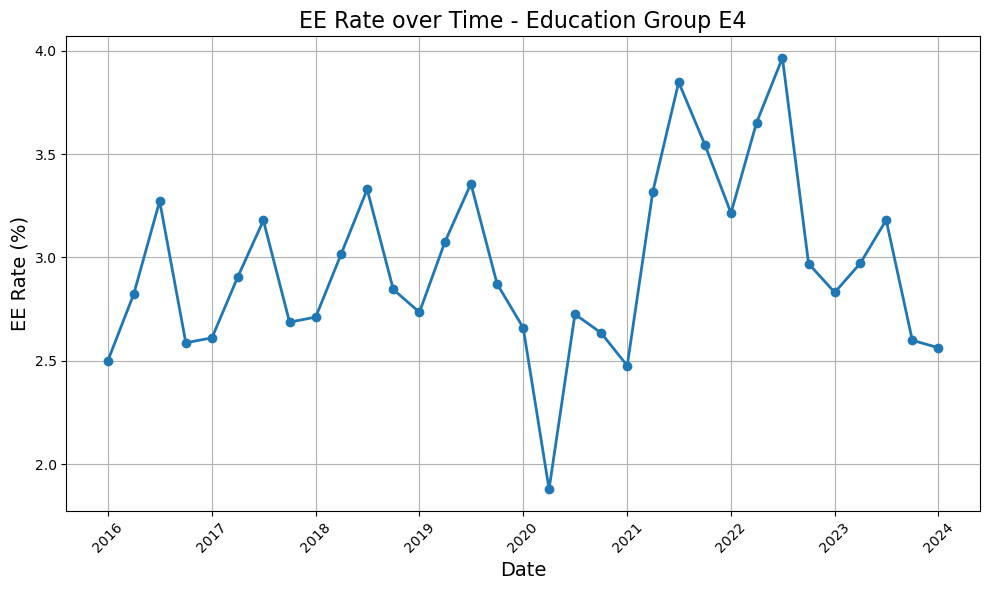

In [15]:
import matplotlib.pyplot as plt

# Multiply rates by 100 to express in percentage terms
pivot_df = pivot_df * 100

# Plotting
for edu_group in pivot_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(pivot_df.index, pivot_df[edu_group], marker='o', linewidth=2)
    plt.title(f'EE Rate over Time - Education Group {edu_group}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('EE Rate (%)', fontsize=14)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
